## Transfer learning to recognise new pictures

In [1]:
import logging
import tensorflow as tf
import keras

logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)
log = logging.getLogger()

%config Completer.use_jedi = False # make autocompletion works in jupyter

tf.__version__

'2.4.1'

In [6]:
import argparse 

args = argparse.Namespace()
args.train_full_folder = './data/transfer-pic/'
args.train_full_car_folder = args.train_full_folder + 'car/'
args.train_full_no_car_folder = args.train_full_car_folder + 'no-car/'
args.train_fraction = 0.8
args.seed = 101
args.batch_size = 32
args.epochs = 1

Found 84 files belonging to 2 classes.
Using 68 files for training.
Found 84 files belonging to 2 classes.
Using 16 files for validation.
Model: "model_8"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_9 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, None, None, 3 864         input_9[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, None, None, 3 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, None, None, 3 

2021-06-16 17:27:53,630 : WARNING : 5 out of the last 13 calls to <function Model.make_train_function.<locals>.train_function at 0x158d87280> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.


3/3 [==============================] - ETA: 0s - loss: 2040.1657 - accuracy: 0.5362WARNING:tensorflow:6 out of the last 6 calls to <function Model.make_test_function.<locals>.test_function at 0x158d879d0> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.


2021-06-16 17:27:58,202 : WARNING : 6 out of the last 6 calls to <function Model.make_test_function.<locals>.test_function at 0x158d879d0> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.


3/3 [==============================] - 14s 2s/step - loss: 2292.2687 - accuracy: 0.5308 - val_loss: 1508.6267 - val_accuracy: 0.4375


2021-06-16 17:27:58,205 : INFO : History keys: dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


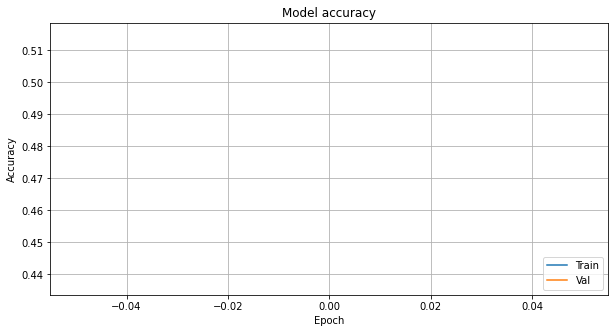

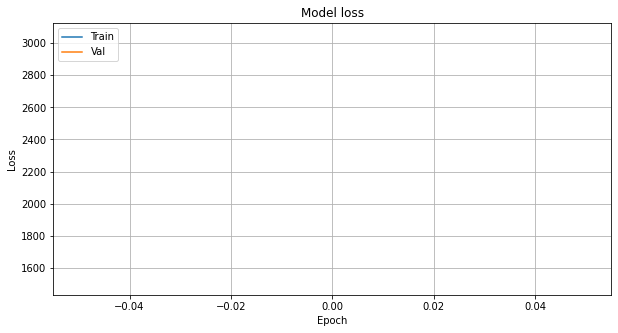

Model: "model_8"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_9 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, None, None, 3 864         input_9[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, None, None, 3 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, None, None, 3 0           block1_conv1_bn[0][0]            
____________________________________________________________________________________________

2021-06-16 17:28:16,706 : WARNING : 5 out of the last 13 calls to <function Model.make_train_function.<locals>.train_function at 0x1592e6d30> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.


3/3 [==============================] - ETA: 0s - loss: 6.0470 - accuracy: 0.5202WARNING:tensorflow:7 out of the last 7 calls to <function Model.make_test_function.<locals>.test_function at 0x1592e68b0> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.


2021-06-16 17:28:28,587 : WARNING : 7 out of the last 7 calls to <function Model.make_test_function.<locals>.test_function at 0x1592e68b0> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.


3/3 [==============================] - 30s 6s/step - loss: 5.9032 - accuracy: 0.5225 - val_loss: 46.1642 - val_accuracy: 0.3750


2021-06-16 17:28:28,589 : INFO : History keys: dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


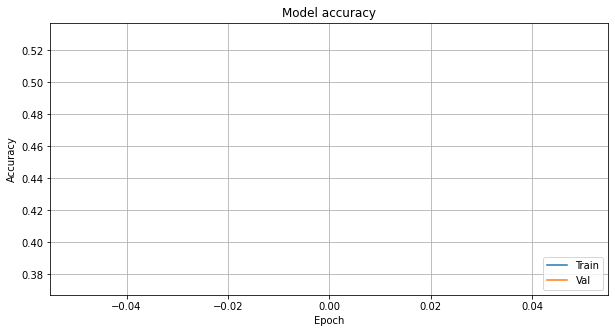

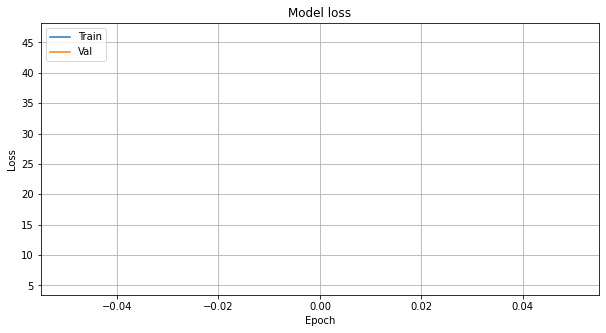

In [22]:
import matplotlib.pyplot as plt

def plot_history(history):
    log.info("History keys: %s", history.history.keys())
    # Accuracy
    fig, ax = plt.subplots(figsize=(10, 5))
    ax.plot(history.history['accuracy'], label='Train')
    ax.plot(history.history['val_accuracy'], label='Test')
    ax.set_title('Model accuracy')
    ax.set_ylabel('Accuracy')
    ax.set_xlabel('Epoch')
    ax.grid(True)
    ax.legend(['Train', 'Val'], loc='lower right')
    
    # Loss
    plt.figure(figsize=(10,5))
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')
    plt.grid()
    plt.show()

def build_dataset(subset='training'):
    dataset = tf.keras.preprocessing.image_dataset_from_directory(args.train_full_folder, 
                                                                  validation_split=1 - args.train_fraction, 
                                                                  subset=subset, seed=args.seed)
#     for d in dataset:
#         print(d)
#         break
    return dataset

def build_model():
        base_model = keras.applications.xception.Xception(weights="imagenet", include_top=False)
        avg = keras.layers.GlobalAveragePooling2D()(base_model.output)
        output = keras.layers.Dense(1, activation='sigmoid')(avg)
        model = keras.Model(inputs=base_model.input, outputs=output)
        return base_model, model
    
    
def train(base_model, model, train_data, val_data, train_base=False, epochs=args.epochs, lr=0.2):
        for l in base_model.layers:
            l.trainable = train_base
        optimizer = keras.optimizers.SGD(lr=lr, momentum=0.9, decay=0.01)
        model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
        print(model.summary())
        history = model.fit(train_data, epochs=epochs, validation_data=val_data)
        plot_history(history)
        

def pipeline():
    train_data = build_dataset()
    val_data = build_dataset(subset='validation')
    base_model, model = build_model()
    train(base_model, model, train_data, val_data)
    train(base_model, model, train_data, val_data, train_base=True, lr=0.005)
    
pipeline()